In [1]:
import pandas
import datetime
import os

In [2]:
item_files = []
files = os.listdir("price_data/")
for file in files:
    if file.endswith(".xlsx") and not file.startswith("~"):
        item_files.append(file)

item_files

['SeriesReport-20200923061037_53e17e.xlsx',
 'SeriesReport-20200923061104_e21280.xlsx',
 'SeriesReport-20200923061040_d7aa71.xlsx',
 'SeriesReport-20200923061012_a355a6.xlsx',
 'SeriesReport-20200923061053_9cefd9.xlsx',
 'SeriesReport-20200923061042_774305.xlsx',
 'SeriesReport-20200923061101_50c64a.xlsx',
 'SeriesReport-20200923061050_e75eb4.xlsx',
 'SeriesReport-20200923061107_0fba9c.xlsx',
 'SeriesReport-20200923060947_f7921a.xlsx',
 'SeriesReport-20200923061055_780154.xlsx',
 'SeriesReport-20200923061058_592fdd.xlsx',
 'SeriesReport-20200923061110_887b10.xlsx',
 'SeriesReport-20200923061045_d7ea9d.xlsx',
 'SeriesReport-20200923061034_6a60d2.xlsx']

In [3]:
all_dfs = []
for file in item_files:
    df = pandas.read_excel(os.path.join('price_data', file))
    item = df.iloc[5, 1]
    df = df.drop(range(0, 9))
    column_names = list(range(0, 13))
    column_names[0] = 'year'
    df.columns = column_names
    df = pandas.melt(df, id_vars=['year'], value_vars=df.columns[1:])
    df['item'] = item
    df['month'] = df['variable']
    df['day'] = 1
    df['date'] = pandas.to_datetime(df[['year', 'month', 'day']])
    df.index = df['date']
    df = df.drop(['year', 'month', 'variable', 'day', 'date'], axis=1)
    all_dfs.append(df)
    
all_data = pandas.concat(all_dfs)
all_data.to_csv('all_price_data.csv')



In [4]:
all_data = all_data.pivot(columns='item', values='value')
all_data.to_csv('all_price_data_pivoted.csv')

In [5]:
all_data.head()

item,"Bacon, sliced, per lb. (453.6 gm)","Bananas, per lb. (453.6 gm)","Bread, white, pan, per lb. (453.6 gm)","Chicken, fresh, whole, per lb. (453.6 gm)","Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm)","Eggs, grade A, large, per doz.",Electricity per KWH,"Flour, white, all purpose, per lb. (453.6 gm)",Fuel oil #2 per gallon (3.785 liters),"Gasoline, all types, per gallon/3.785 liters","Gasoline, unleaded regular, per gallon/3.785 liters","Milk, fresh, whole, fortified, per gal. (3.8 lit)","Oranges, Navel, per lb. (453.6 gm)","Rice, white, long grain, uncooked, per lb. (453.6 gm)","Tomatoes, field grown, per lb. (453.6 gm)"
date,,,,,,,,,,,,,,,
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.594,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN


In [6]:
all_data.tail()

item,"Bacon, sliced, per lb. (453.6 gm)","Bananas, per lb. (453.6 gm)","Bread, white, pan, per lb. (453.6 gm)","Chicken, fresh, whole, per lb. (453.6 gm)","Coffee, 100%, ground roast, all sizes, per lb. (453.6 gm)","Eggs, grade A, large, per doz.",Electricity per KWH,"Flour, white, all purpose, per lb. (453.6 gm)",Fuel oil #2 per gallon (3.785 liters),"Gasoline, all types, per gallon/3.785 liters","Gasoline, unleaded regular, per gallon/3.785 liters","Milk, fresh, whole, fortified, per gal. (3.8 lit)","Oranges, Navel, per lb. (453.6 gm)","Rice, white, long grain, uncooked, per lb. (453.6 gm)","Tomatoes, field grown, per lb. (453.6 gm)"
date,,,,,,,,,,,,,,,
2020-08-01,5.559,0.576,1.495,1.609,4.504,1.328,0.137,0.459,2.161,2.245,2.177,3.406,NaN,0.769,1.874
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

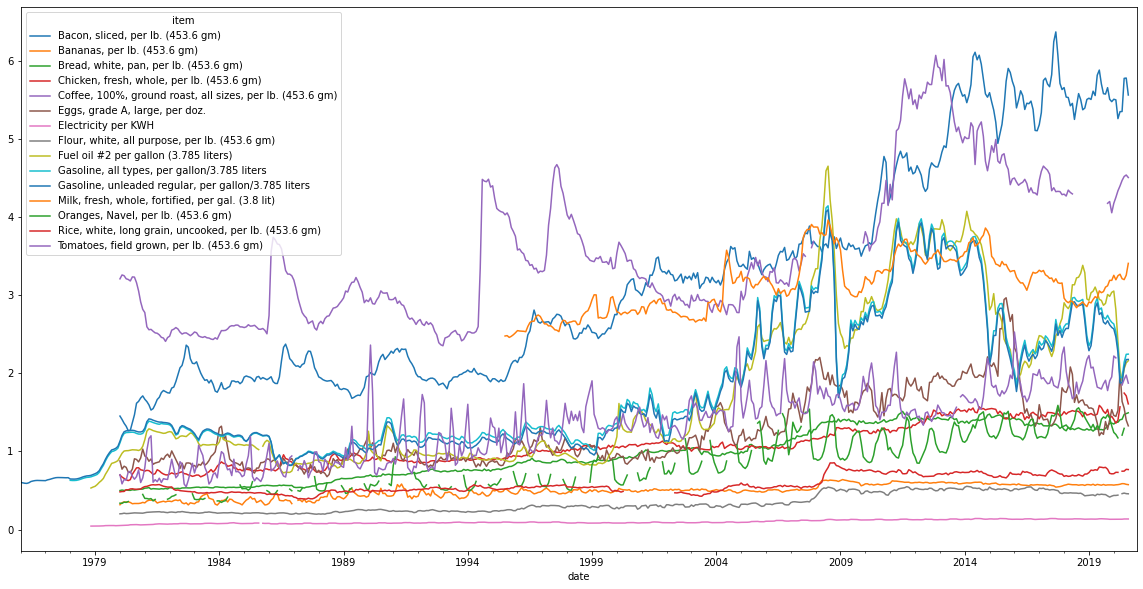

In [7]:
all_data.plot.line(figsize=(20, 10))